# 生成した乱数の確率分布

C++で生成した乱数列のファイル
- `result/uni`: U(0,1)
- `result/norm`: N(0,1)
- `result/exp`: Exp(1)
- `result/pow`: Pow(0.5,1) (alpha,xmin)

これらを下記コマンドで1つのファイル `result/rand_arrays` にまとめた．

```sh
$ cd result
$ echo "uni,norm,exp,pow" > rand_arrays.csv
$ paste -d, uni norm exp pow >> rand_arrays.csv
$ head -n5 rand_arrays.csv 
uni,norm,exp,pow
0.997185,0.263432,0.855473,1.39089
0.932557,-0.229653,0.637446,2.93768
0.128124,3.00901,0.772468,4.23051
0.999041,-0.922904,1.07197,1.25043
```

各乱数列について，CDFとPDFを描画する．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [2]:
rand_arrays1 = pd.read_csv('../result_seed1/rand_arrays.csv')
rand_arrays2 = pd.read_csv('../result_seed2/rand_arrays.csv')
rand_arrays3 = pd.read_csv('../result_seed3/rand_arrays.csv')
display(rand_arrays1)
display(rand_arrays2)
display(rand_arrays3)

,uni,norm,exp,pow
0,0.997185,0.263432,0.855473,1.39089
1,0.932557,-0.229653,0.637446,2.93768
2,0.128124,3.009010,0.772468,4.23051
3,0.999041,-0.922904,1.071970,1.25043
4,0.236089,-0.599964,2.451310,82.34960
...,...,...,...,...
999995,0.535547,3.372570,2.596210,99.00790
999996,0.553315,-2.576500,3.739610,69.53280
999997,0.538595,0.182253,0.855582,5.18135
999998,0.895352,-2.433540,0.421911,146.64800


,uni,norm,exp,pow
0,0.185082,-0.693435,2.777580,2.13281
1,0.931541,2.495060,1.207620,1.68872
2,0.947731,-0.136105,0.560341,2295.34000
3,0.484749,-1.020880,0.676520,1.39798
4,0.320536,0.977583,0.413671,1.14585
...,...,...,...,...
999995,0.320465,-0.386440,4.132610,2.15580
999996,0.747640,-0.628341,1.163090,446.00900
999997,0.647999,-1.391370,0.145967,2.04811
999998,0.631991,1.445000,0.475894,281.61300


,uni,norm,exp,pow
0,0.070725,-0.403236,1.796810,1.22971
1,0.839949,-0.120398,0.471583,2.06328
2,0.121329,0.270750,0.061338,6.74706
3,0.569311,1.713650,1.561680,11.73950
4,0.437062,1.585990,0.589972,135.45400
...,...,...,...,...
999995,0.172409,0.211528,0.379206,1.50697
999996,0.760081,0.701414,0.520628,3.82642
999997,0.745657,0.549597,0.279577,2.11379
999998,0.076959,-0.601114,0.383968,3.36983


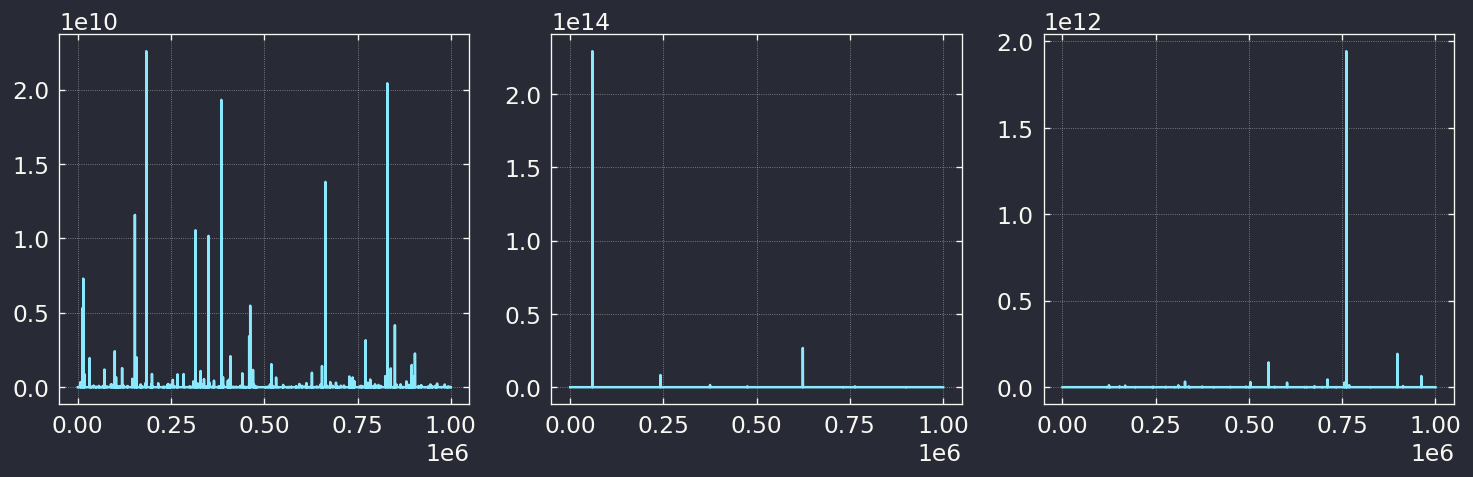

In [7]:
_, axes = plt.subplots(1,3,figsize=(15,4))
axes[0].plot(rand_arrays1['pow'])
axes[1].plot(rand_arrays2['pow'])
axes[2].plot(rand_arrays3['pow'])

In [4]:
def calc_stats_gradually(rand_array):
    N = len(rand_array)
    mu = rand_array.cumsum() / np.arange(1, N+1)
    std = np.sqrt((rand_array*rand_array).cumsum() / np.arange(1, N+1) - mu*mu)
    return mu, std

mu_exp1, std_exp1 = calc_stats_gradually(rand_arrays1['exp'])
mu_pow1, std_pow1 = calc_stats_gradually(rand_arrays1['pow'])

mu_exp2, std_exp2 = calc_stats_gradually(rand_arrays2['exp'])
mu_pow2, std_pow2 = calc_stats_gradually(rand_arrays2['pow'])

mu_exp3, std_exp3 = calc_stats_gradually(rand_arrays3['exp'])
mu_pow3, std_pow3 = calc_stats_gradually(rand_arrays3['pow'])

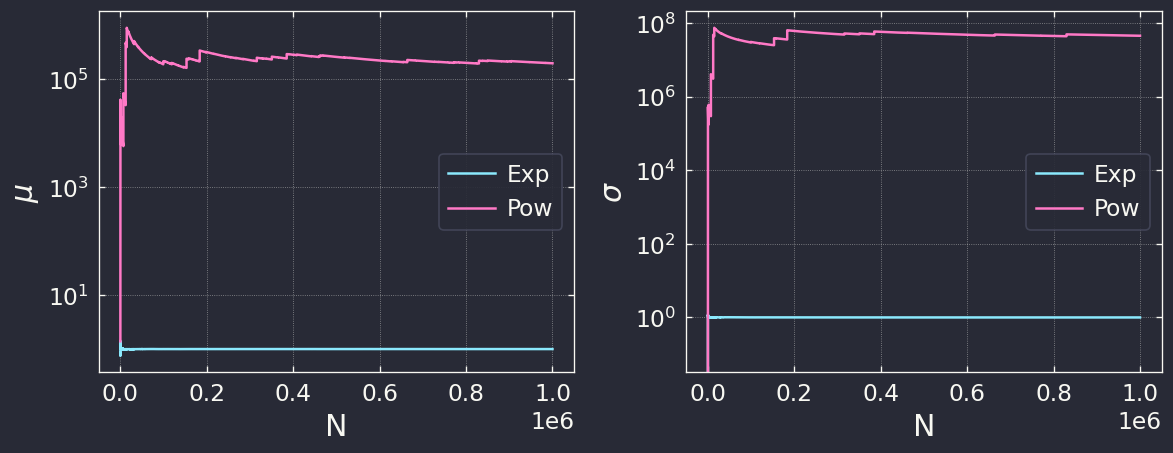

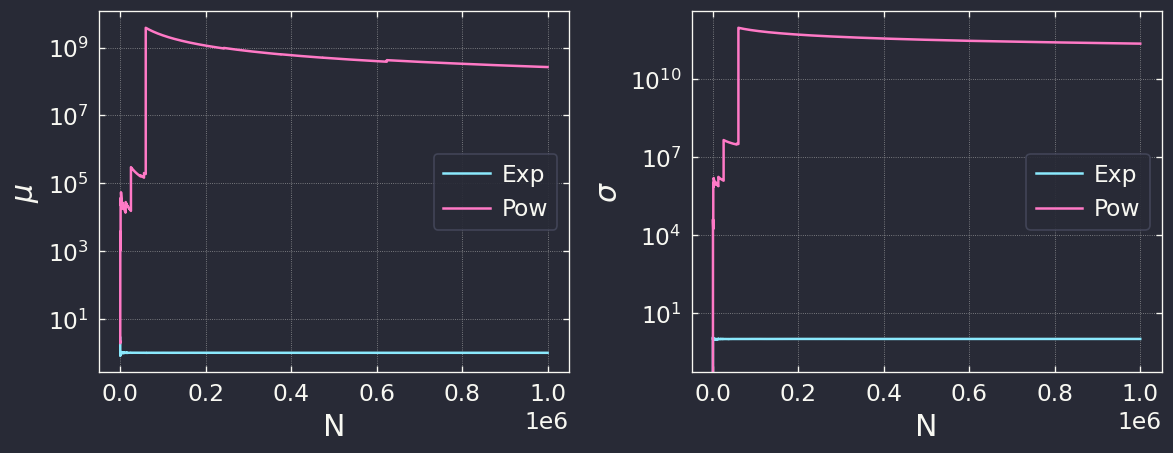

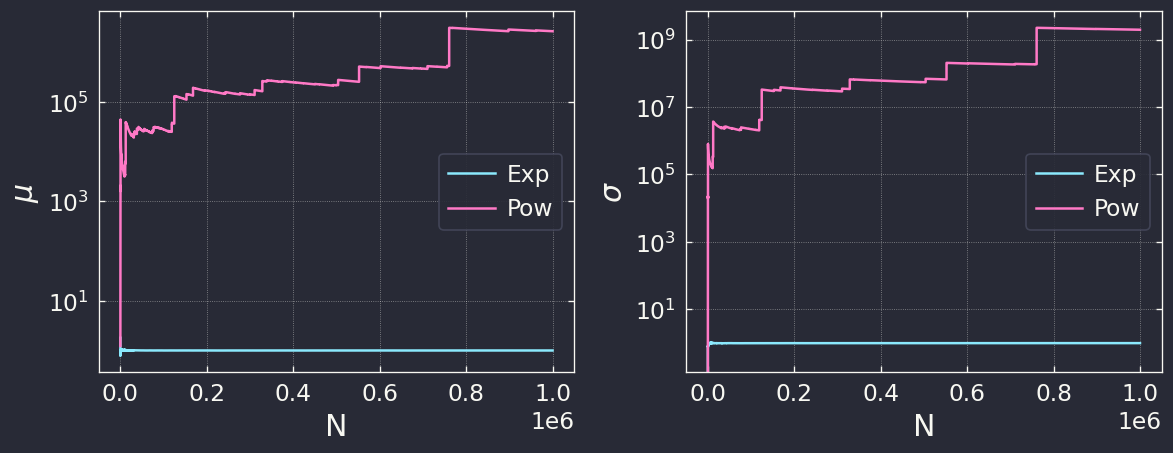

In [5]:
def compare_stats(mu_exp, mu_pow, std_exp, std_pow):
    _, axes = plt.subplots(1,2, figsize=(10,4))

    ax = axes[0]
    ax.plot(mu_exp, label='Exp')
    ax.plot(mu_pow, label='Pow')
    ax.set_xlabel('N')
    ax.set_ylabel('$\mu$')
    ax.set_yscale('log')
    ax.legend()

    ax = axes[1]
    ax.plot(std_exp, label='Exp')
    ax.plot(std_pow, label='Pow')
    ax.set_xlabel('N')
    ax.set_ylabel('$\sigma$')
    ax.set_yscale('log')
    ax.legend()

    plt.tight_layout()

compare_stats(mu_exp1, mu_pow1, std_exp1, std_pow1)
compare_stats(mu_exp2, mu_pow2, std_exp2, std_pow2)
compare_stats(mu_exp3, mu_pow3, std_exp3, std_pow3)